## Data Characterization
This notebook is a continuation of the notebook titled, '00_data_merging.ipynb'. It contains code for exploring the combined data set consisting of the mRFEA index [i.e, the outcome variable] and ACS variables [i.e, feature variables].

In [1]:
## import required packages
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import missingno as ms 

In [2]:
## import complete dataset with all variables merged into a single file
df=pd.read_csv('combined_data.csv')
df.head()

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,state,mrfei,fips_modified,NAME,perc_public_transport,perc_white,perc_black,perc_hispanic,perc_asian,perc_native,...,perc_snap,inequality,unemploy,below_high_school,college_no_degree,associates_degree,bach_or_more,value,perc_no_vehicle,perc_rural
0,AL,16.666666666666668,1400000US01001020100,"Census Tract 201, Autauga County, Alabama",4.651163,78.717523,16.196794,0.829187,0.000000,0.000000,...,5.747126,0.513,3.8,10.5,17.7,6.0,25.4,120700.0,7.183908,16.631799
1,AL,16.666666666666668,1400000US01001020200,"Census Tract 202, Autauga County, Alabama",0.000000,38.465347,59.158416,0.297030,2.079208,0.000000,...,8.904110,0.386,7.9,14.9,17.2,3.3,26.7,138500.0,15.753425,0.000000
2,AL,17.647058823529413,1400000US01001020300,"Census Tract 203, Autauga County, Alabama",0.907912,82.020886,16.596105,1.100762,0.282247,0.000000,...,9.712510,0.405,5.7,9.5,25.0,8.5,16.4,111300.0,7.847708,0.000000
3,AL,13.333333333333334,1400000US01001020400,"Census Tract 204, Autauga County, Alabama",0.000000,93.863636,2.314050,2.644628,0.392562,0.000000,...,6.688418,0.357,4.5,6.2,24.5,6.5,25.3,126300.0,1.033170,0.000000
4,AL,6.25,1400000US01001020500,"Census Tract 205, Autauga County, Alabama",0.000000,80.177098,11.581807,4.739384,1.730731,0.201248,...,3.742315,0.334,3.7,2.8,22.4,6.7,37.5,173000.0,5.960973,0.037154


In [3]:
## check dimensions
df.shape

(65345, 25)

The unit of analysis for this data set is the census tract. Additionally, the data is represented in a way where each observation has a fixed set of attributes [i.e, record data]. Both of these characterizations are suitable for the goal of this project, which is to distinguish between and to characterize food deserts; food swamps; and healthful areas at the census tract level. 

In [4]:
## check missingness
df.isna().sum()

state                        0
mrfei                     1221
fips_modified                0
NAME                     14591
perc_public_transport    14591
perc_white               14534
perc_black               14534
perc_hispanic            14534
perc_asian               14534
perc_native              14534
perc_pacific             14534
median_income            14671
SQMI                     14537
pop_density              14537
perc_pov                 14607
perc_snap                14622
inequality               14648
unemploy                 14591
below_high_school        14539
college_no_degree        14539
associates_degree        14539
bach_or_more             14539
value                    15060
perc_no_vehicle          14622
perc_rural               14503
dtype: int64

There are 14591 observations that do not have a census tract name (i.e., the variable NAME). Since other variables like perc_public_transport and perc_black have the same number of missing values, it is very likely that this is because of the same census tracts that have an mrfei value but do not have corresponding entry in the ACS 5-year estimates. 

Let us see which states these census tracts belong to: 

In [5]:
df.drop('state',1).isna().groupby(df.state).sum().sort_values(by=['NAME'], ascending=False).filter(['NAME'])

,NAME
state,
CA,1130.0
CO,1075.0
FL,991.0
TX,919.0
NY,750.0
IL,582.0
NC,582.0
GA,536.0
PA,515.0


CA has the most missing values where census tracts in the mRFEI Index do not have a corresponding value in the ACS data. This could affect the generalizability of the results; there may be a reason for this systematic missingness.

### Outcome variable: mRFEI Index

In [6]:
## view outcome dtype
df.mrfei.dtype

dtype('O')

In [7]:
## convert mrfei to float dtype
df['mrfei']=pd.to_numeric(df['mrfei'], errors='coerce')

In [8]:
## view variable values
df.mrfei.head()

0    16.666667
1    16.666667
2    17.647059
3    13.333333
4     6.250000
Name: mrfei, dtype: float64

**Explore missingness in the outcome variable**

In [9]:
## create dataframe with just mrfei and state variables
df_mrfei=df.filter(['mrfei', 'state'])
df_mrfei.head()

,mrfei,state
0,16.666667,AL
1,16.666667,AL
2,17.647059,AL
3,13.333333,AL
4,6.250000,AL


In [10]:
## query and save number of observations for each state [this does not include missing values]
state_obs=df_mrfei.groupby(df_mrfei.state).count().reset_index()
state_obs.head(10)

,state,mrfei
0,AK,143
1,AL,1073
2,AR,615
3,AZ,1071
4,CA,6962
5,CO,1050
6,CT,805
7,DC,188
8,DE,194
9,FL,3129


In [11]:
## query and save number of missing values for each state
state_miss=df_mrfei.drop('state',1).isna().groupby(df_mrfei.state).sum().reset_index()
state_miss.head()

,state,mrfei
0,AK,15.0
1,AL,8.0
2,AR,9.0
3,AZ,36.0
4,CA,87.0


In [12]:
## merge observation and missing data by state
state_obs=state_obs.merge(state_miss, how='left', on='state').filter(['state', 'mrfei_x', 'mrfei_y'])#keep only state, number of observations [excluding those with missing]; and number of missing values
state_obs.head()

,state,mrfei_x,mrfei_y
0,AK,143,15.0
1,AL,1073,8.0
2,AR,615,9.0
3,AZ,1071,36.0
4,CA,6962,87.0


In [13]:
#sum columns to get total observations by state
state_obs['total']=state_obs.mrfei_x + state_obs.mrfei_y

In [14]:
# calculate percent missing observations for each state
state_obs['perc_missing']=(state_obs.mrfei_y/state_obs.total)*100
state_obs.sort_values(by=['perc_missing'], ascending=False)

,state,mrfei_x,mrfei_y,total,perc_missing
41,SD,201,34.0,235.0,14.468085
26,MT,237,33.0,270.0,12.222222
28,ND,200,27.0,227.0,11.894273
32,NM,411,45.0,456.0,9.868421
0,AK,143,15.0,158.0,9.493671
46,VT,167,12.0,179.0,6.703911
13,ID,265,15.0,280.0,5.357143
21,ME,326,18.0,344.0,5.232558
11,HI,271,14.0,285.0,4.912281
29,NE,481,22.0,503.0,4.373757


SD, ND, and MT have the highest share of missing mrfei values. SD has the highest percent of missing values at about 14.5%. It also has the smallest number of census tracts at 235; these observations will further be pared down after removing missing observations. Note that, in general[i.e., outside of this project], the cenus bureau reports that SD has just over 200 census tracts.  

In [15]:
## run descriptives of outcome variable mrfei 
df['mrfei'].describe()

count    64100.000000
mean        11.445051
std         12.183212
min          0.000000
25%          3.276773
50%          9.523810
75%         15.789474
max        100.000000
Name: mrfei, dtype: float64

NOTE: Amin et al. found a median of 9.09 and a mean of 11.30. The estimates listed above for both the mean and median are only slightly different. Looking at the standard deviation, there is quite a lot of variability/spread in the distribution of the data.

Additionally, it is clear that it only contains positive, continious values ranging from 0 to 100. This means that the outcome variable is a continious attribute. Additionally, given that it has a true zero, it is also a quantitative ratio attribute where both multiplication and division are meaningful.

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


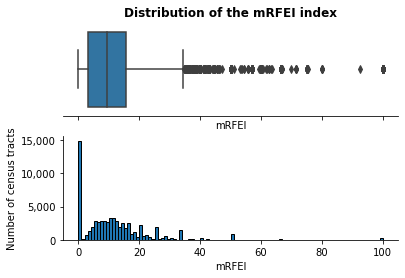

In [16]:
## view distribution graphically
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.mrfei, ax=ax_box)
plt.hist(df.mrfei,bins=100,  edgecolor='k')
plt.xlabel('mRFEI')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Distribution of the mRFEI index", fontweight='bold')
ax_box.set_xlabel("mRFEI")
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax_hist.yaxis.set_major_formatter(tick) 
ax_box.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('output/images/mrfei_distribution.png')## save as png for memo #2

Based on the plots above, the outcome variable is not normally distributed. It has a pronounced skew where majority of the census tracts have an mRFEI index of 0. According to the creators of this index, a score of 0 is associated with food deserts. We may need to consider normalizing this outcome variable before modeling.On the other hand, the fact that most of the data set is made up of zeroes could help in reducing computational expense. There are also quite a lot of outliers in the data as indicated by the box plot. Since the continious attribute will be converted in to three separate target variables, this shouldn't be to much of a concern. 

In [17]:
## check how many observations have a mrfei value of 0
df.filter(['state', 'NAME']).loc[df['mrfei']==0]

,state,NAME
7,AL,NaN
8,AL,"Census Tract 209, Autauga County, Alabama"
10,AL,"Census Tract 211, Autauga County, Alabama"
11,AL,"Census Tract 101, Baldwin County, Alabama"
12,AL,"Census Tract 102, Baldwin County, Alabama"
...,...,...
65326,WY,"Census Tract 9708, Sweetwater County, Wyoming"
65331,WY,"Census Tract 9711, Sweetwater County, Wyoming"
65332,WY,"Census Tract 9712, Sweetwater County, Wyoming"
65333,WY,"Census Tract 9716, Sweetwater County, Wyoming"


In [18]:
## see which states have the most food deserts (i.e, mrfei==0)
df.filter(['state', 'NAME']).loc[df['mrfei']==0].groupby(['state']).count().sort_values(by=['NAME'], ascending=False)

,NAME
state,
TX,914
CA,711
OH,694
MI,667
NY,647
IL,630
PA,592
IN,376
MA,334


Out of the 65,345  observations, 14875 (i.e, approx 23%) have an mrfei value of zero. Texas has the most census tracts with a mrfei value of zero [i.e, Texas has the most food deserts]

Let's see if each state follows the distribution above:

In [19]:
## change shape of dataframe to wide to graph density plot for each state
df_wide =df.pivot(columns='state', values='mrfei')
df_wide.head() 

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,NaN,16.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,16.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,17.647059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,13.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'mRFEI Index')

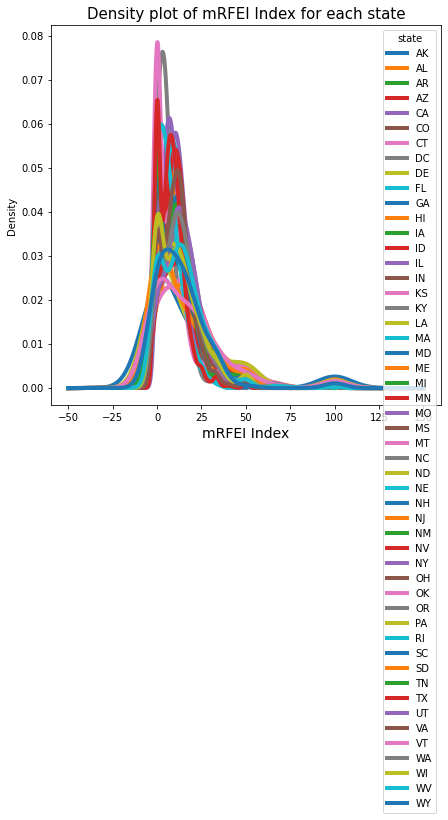

In [20]:
## plot distribution
df_wide.plot.density(figsize = (7, 7), linewidth = 4)
plt.title('Density plot of mRFEI Index for each state', size=15)
plt.xlabel('mRFEI Index',  size=14)

Generally speaking, the mRFEI Index for each state follows a similar distribution where the mean is approximately at 11. Some states have two peaks, likely because of having several census tracts with a value of zero.

### Features

**`Transportation`**

In [21]:
## check missingness 
df.perc_public_transport.isna().sum()

14591

There are 14,591 census tracts are missing the census data for transport. During the preprocessing stage, these observations will be dropped since the variable is important for this analysis.

In [22]:
## run descriptives of transport variable 
df['perc_public_transport'].describe()

count    50754.000000
mean         6.145657
std         12.563104
min          0.000000
25%          0.000000
50%          1.238812
75%          5.485570
max        100.000000
Name: perc_public_transport, dtype: float64

The transport variable has values that range from 0 to 100. It is a continious , quantitative ratio attribute with a true zero [i.e, a zero means that non of the residents in a census tract us public transportation]. As evidenced by the gap between 75% and max, there are outliers in this variable. Additionally, there's quite a lot of variation in the distribution around the mean. On average, 6% of residents in a census tract use public transportation. There are outliers where 100% of the residents in a census tract use public transportation. The median is about 1.2%, while the mean is about 6.1% indicating that the outliers are influencing the value of the mean.

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


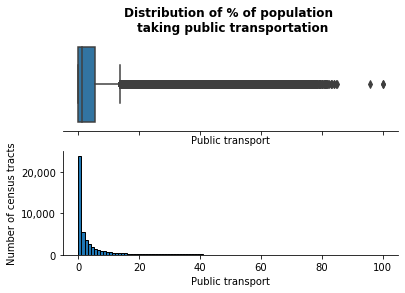

In [23]:
## view distribution graphically
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.perc_public_transport, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.perc_public_transport,bins=100,  edgecolor='k')
plt.xlabel('Public transport')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Distribution of % of population \n taking public transportation", fontweight='bold')
ax_box.set_xlabel("Public transport")

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax_hist.yaxis.set_major_formatter(tick) 
ax_box.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('output/images/transport.png')## export figure for memo

**`ACS demographic estimates`**

In [24]:
## check missingness 
df[['perc_white','perc_black', 'perc_hispanic', 'perc_asian', 'perc_native','perc_pacific']].isna().sum()

perc_white       14534
perc_black       14534
perc_hispanic    14534
perc_asian       14534
perc_native      14534
perc_pacific     14534
dtype: int64

There seems to be systematic missingnes in the data. let's see if the same census tracts are missing values for all these attributes

In [25]:
df.loc[(df['perc_white'].isna())&(df['perc_black'].isna()) &(df['perc_hispanic'].isna()) & (df['perc_asian'].isna())& (df['perc_native'].isna())&(df['perc_pacific'].isna())]

,state,mrfei,fips_modified,NAME,perc_public_transport,perc_white,perc_black,perc_hispanic,perc_asian,perc_native,...,perc_snap,inequality,unemploy,below_high_school,college_no_degree,associates_degree,bach_or_more,value,perc_no_vehicle,perc_rural
7,AL,0.000000,1400000US01001020800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,AL,41.176471,1400000US01003010901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,AL,18.181818,1400000US01003010902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,AL,16.666667,1400000US01003011100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,AL,15.789474,1400000US01003011404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65312,WY,12.500000,1400000US56029995500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65321,WY,22.222222,1400000US56035000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65334,WY,25.000000,1400000US56039997600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65335,WY,10.000000,1400000US56039997700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The suspicion is confirmed. The same 14534 tracts are missing all demographic estimates. This will cause issues for the generalizability of the results. Since the missingess is systematic, these tracts will be removed instead of being imputed.

In [26]:
## check descriptives
df[['perc_white','perc_black', 'perc_hispanic', 'perc_asian', 'perc_native','perc_pacific']].describe()

,perc_white,perc_black,perc_hispanic,perc_asian,perc_native,perc_pacific
count,50811.000000,50811.000000,50811.000000,50811.000000,50811.000000,50811.000000
mean,63.927813,14.559633,14.387397,4.369395,0.638539,0.137540
std,31.114252,23.989836,20.734372,8.798366,3.842794,0.970836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.209183,0.596680,1.715937,0.000000,0.000000,0.000000
50%,74.762958,3.534304,5.436502,1.198213,0.000000,0.000000
75%,90.374382,15.581323,17.098197,4.467897,0.379185,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,58.066429


On average, the share of the population that is black and hispanic is about 14%, followed by 4% for share of the population that is asian and 0.5% and 0.1 for share of population that is native american and pacific islander, respectively. perc_native and perc_pacific are not as prevalent in the data; it seems like their distribution will be heavily skewed. perc_black and perc_hispanic have comparatively more spread. However, they are likely skewed as well.

In [27]:
##melt copy of dataframe for graphing purposes
df_for_graph=df[['perc_white','perc_black', 'perc_hispanic', 'perc_asian', 'perc_native','perc_pacific']].melt()
df_for_graph.head()

,variable,value
0,perc_white,78.717523
1,perc_white,38.465347
2,perc_white,82.020886
3,perc_white,93.863636
4,perc_white,80.177098


/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 87204 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


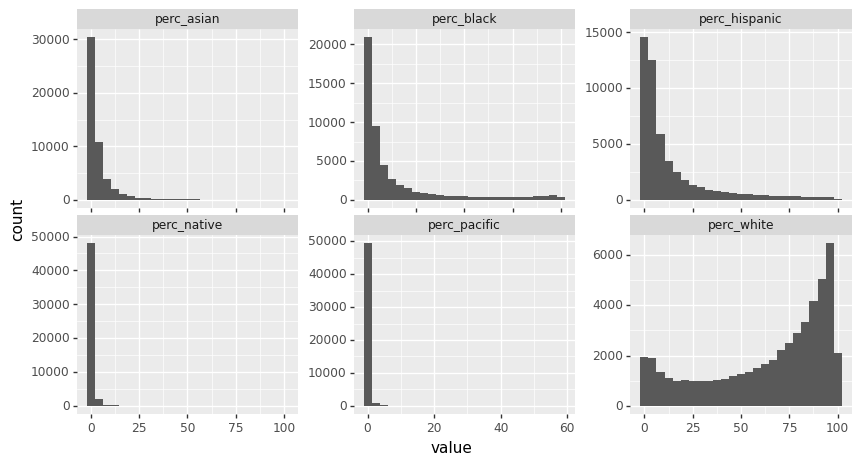

<ggplot: (8775160951025)>

In [28]:
## plot distributions 
(
    ggplot(df_for_graph,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

As suspected all the variables are heavily skewed,  with perc_native and perc_pacific being the most skewed. A log transformation is probably necessary during preprocessing. 

**`Median Household Income`**

In [29]:
## check missingness
df.median_income.isna().sum()

14671

In [30]:
## generate descriptives
df.median_income.describe() 

count     50674.000000
mean      54581.805995
std       26863.442181
min        5000.000000
25%       36544.500000
50%       48922.000000
75%       66196.000000
max      249194.000000
Name: median_income, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


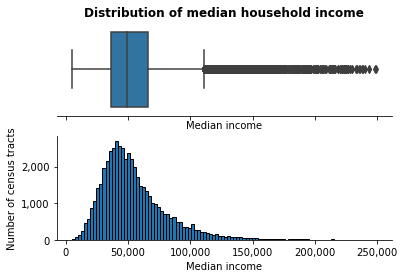

In [31]:
## view distribution graphically

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})
sns.boxplot(df.median_income, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.median_income,bins=100,  edgecolor='k')
plt.xlabel('Median income')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Distribution of median household income", fontweight='bold')
ax_box.set_xlabel("Median income")
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax_hist.yaxis.set_major_formatter(tick) 
ax_box.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('output/images/hh_income.png')## save for memo II

Distribution is slightly skewed. Has high value outliers .

**`Populaion density`**

In [32]:
## check missingness
df.pop_density.isna().sum()

14537

In [33]:
##check distribution
df.pop_density.describe()

count     50808.000000
mean       5691.527298
std       12285.029975
min           0.027566
25%         415.658503
50%        2480.080972
75%        5604.027778
max      224716.666667
Name: pop_density, dtype: float64

There are census tracts with really low population density. let's explore them more:

In [34]:
df.loc[df['pop_density']<1].filter(['pop_density', 'perc_white', 'perc_black', 'perc_native', 'perc_asian', 'perc_pacific', 'perc_hispanic'])

,pop_density,perc_white,perc_black,perc_native,perc_asian,perc_pacific,perc_hispanic
1081,0.526227,5.698083,10.234945,11.639211,52.227923,0.594113,15.473940
1082,0.709802,34.949267,18.207441,17.643743,18.263811,6.538895,0.732807
1139,0.427598,3.533383,0.052737,94.093450,0.052737,0.000000,0.348065
1141,0.071796,16.233766,0.288600,71.500722,0.000000,0.000000,0.000000
1143,0.089498,87.325175,1.660839,3.758741,0.786713,0.000000,0.786713
...,...,...,...,...,...,...,...
65266,0.610223,99.210111,0.000000,0.197472,0.000000,0.000000,0.592417
65288,0.825447,93.653173,0.249875,2.698651,0.599700,0.000000,0.799600
65306,0.986315,93.594392,0.555958,0.531786,0.000000,0.000000,3.722504
65307,0.924647,90.000000,0.864198,1.193416,0.000000,0.000000,5.514403


Tracts with pop_density below 1 all seem to be occupied; lets confirm

In [35]:
df.loc[(df['pop_density']<1)&(df['perc_white']==0)&(df['perc_black']==0)& (df['perc_native']==0)& (df['perc_asian']==0)& (df['perc_pacific']==0)&(df['perc_hispanic']==0)]

,state,mrfei,fips_modified,NAME,perc_public_transport,perc_white,perc_black,perc_hispanic,perc_asian,perc_native,...,perc_snap,inequality,unemploy,below_high_school,college_no_degree,associates_degree,bach_or_more,value,perc_no_vehicle,perc_rural


There aren't any unpopulated census tracts in the data set.

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


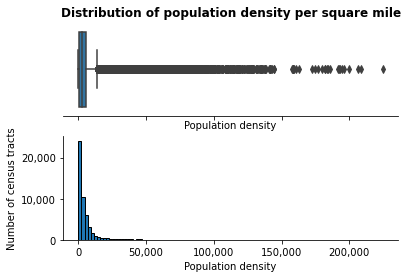

In [36]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df['pop_density'], ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df['pop_density'],bins=100,  edgecolor='k')
plt.xlabel('Population density')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Distribution of population density per square mile", fontweight='bold')
ax_box.set_xlabel("Population density")
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax_hist.yaxis.set_major_formatter(tick) 
ax_box.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('output/images/pop_density.png')

This is a heavily skewed distribution with a lot of tracts that have a population density below 1. As we've seen above, these areas are actually populated.

#### Create correlation matrix for select variables for project memo

In [37]:
## create  object of select variables
x=df.filter(['mrfei', 'pop_density', 'perc_public_transport', 'median_income'])

In [38]:
##  rename variables
x=x.rename(columns={'mrfei':'mRFEI', 'pop_density': 'Population density', 'perc_public_transport': 'Public transport', 'median_income':'Median income'})

In [39]:
## compute correlations
corr=x.corr()
corr

,mRFEI,Population density,Public transport,Median income
mRFEI,1.000000,-0.080833,-0.100133,0.074795
Population density,-0.080833,1.000000,0.762777,-0.054860
Public transport,-0.100133,0.762777,1.000000,-0.033422
Median income,0.074795,-0.054860,-0.033422,1.000000


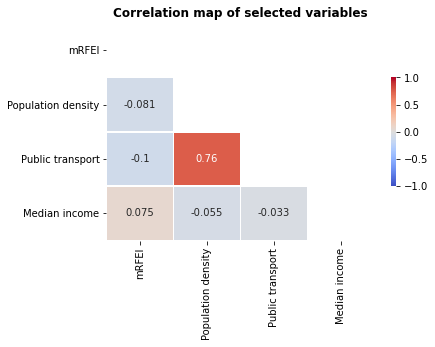

In [40]:
##plot graph
corr_graph=sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), cmap="coolwarm", vmax=1, vmin=-1, center=0,
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation map of selected variables', fontweight='bold')
plt.savefig('output/images/corr_graph.png', bbox_inches='tight')

_________________________

**`Poverty rate`**

In [41]:
## check for missingness
df.perc_pov.isna().sum()

14607

In [42]:
##check distribution
df.perc_pov.describe()

count    50738.000000
mean        15.328058
std         12.502077
min          0.000000
25%          6.119494
50%         11.900724
75%         21.000675
max        100.000000
Name: perc_pov, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Percent below poverty rate')

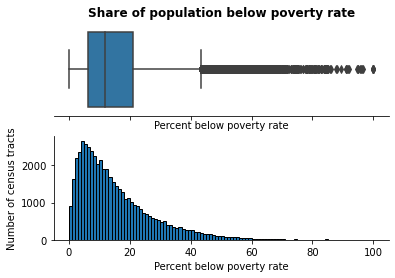

In [44]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.perc_pov, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.perc_pov,bins=100,  edgecolor='k')
plt.xlabel('Percent below poverty rate')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Share of population below poverty rate", fontweight='bold')
ax_box.set_xlabel("Percent below poverty rate")


**`Households with SNAP`**

In [45]:
df.perc_snap.isna().sum()

14622

In [46]:
## check distribution
df.perc_snap.describe()

count    50723.000000
mean        11.495781
std         10.708510
min          0.000000
25%          3.729985
50%          8.304795
75%         15.880294
max        100.000000
Name: perc_snap, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Percent on SNAP')

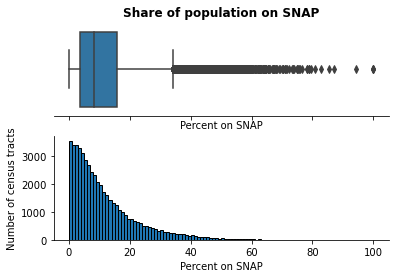

In [47]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.perc_snap, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.perc_snap,bins=100,  edgecolor='k')
plt.xlabel('Percent on SNAP')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Share of population on SNAP", fontweight='bold')
ax_box.set_xlabel("Percent on SNAP")

**`Inequality`**

In [48]:
df.inequality.isna().sum()

14648

In [49]:
## check distribution
df.inequality.describe()

count    50697.000000
mean         0.411784
std          0.062907
min          0.002000
25%          0.369000
50%          0.405000
75%          0.448000
max          0.850000
Name: inequality, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Inequality(gini index)')

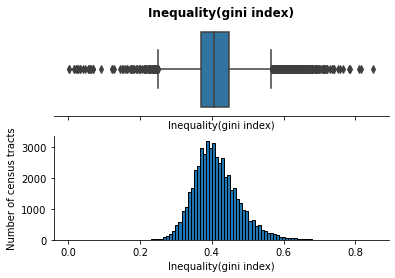

In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.inequality, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.inequality,bins=100,  edgecolor='k')
plt.xlabel('Inequality(gini index)')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Inequality(gini index)", fontweight='bold')
ax_box.set_xlabel("Inequality(gini index)")

**`Unemployment`**

In [51]:
df.unemploy.isna().sum()

14591

In [52]:
##check distribution
df.unemploy.describe()

count    50754.000000
mean         8.699915
std          5.754470
min          0.000000
25%          4.900000
50%          7.400000
75%         10.900000
max        100.000000
Name: unemploy, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Unemployment rate')

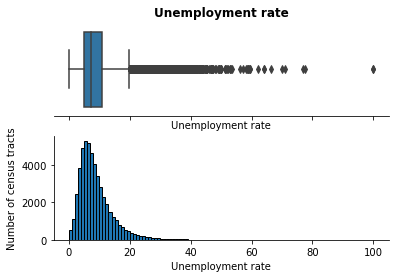

In [53]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.unemploy, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.unemploy,bins=100,  edgecolor='k')
plt.xlabel('Unemployment rate')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Unemployment rate", fontweight='bold')
ax_box.set_xlabel("Unemployment rate")

**`Educational Attainment`**

In [54]:
df[['below_high_school',
       'college_no_degree', 'associates_degree', 'bach_or_more']].isna().sum()

below_high_school    14539
college_no_degree    14539
associates_degree    14539
bach_or_more         14539
dtype: int64

In [55]:
## check distributions
df[['below_high_school',
       'college_no_degree', 'associates_degree', 'bach_or_more']].describe()

,below_high_school,college_no_degree,associates_degree,bach_or_more
count,50806.000000,50806.000000,50806.00000,50806.000000
mean,9.481795,20.302169,7.26541,26.431526
std,6.474654,6.383870,3.35958,18.309315
min,0.000000,0.000000,0.00000,0.000000
25%,4.600000,16.000000,4.90000,12.700000
50%,8.300000,20.100000,7.10000,21.200000
75%,13.200000,24.400000,9.30000,36.100000
max,100.000000,100.000000,52.60000,100.000000


In [56]:
##melt copy of dataframe for graphing purposes
df_for_graph=df[['below_high_school',
       'college_no_degree', 'associates_degree', 'bach_or_more']].melt()
df_for_graph.head()

,variable,value
0,below_high_school,10.5
1,below_high_school,14.9
2,below_high_school,9.5
3,below_high_school,6.2
4,below_high_school,2.8


/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 58156 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


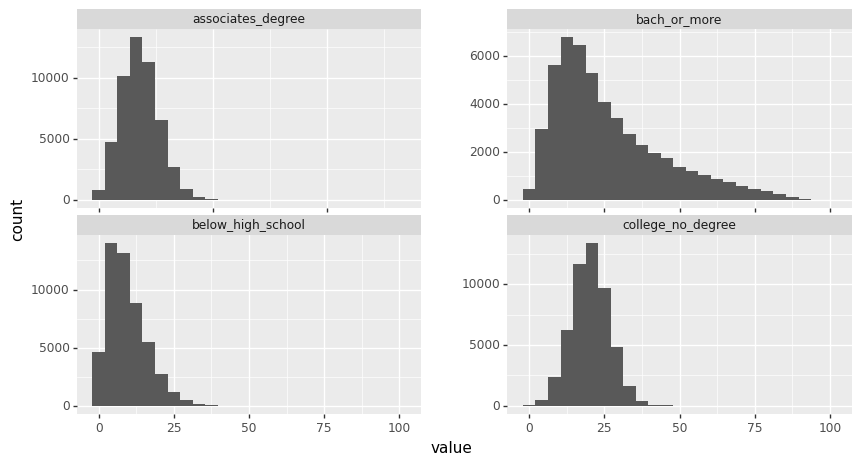

<ggplot: (8775165277305)>

In [57]:
## plot distributions 
(
    ggplot(df_for_graph,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 58156 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


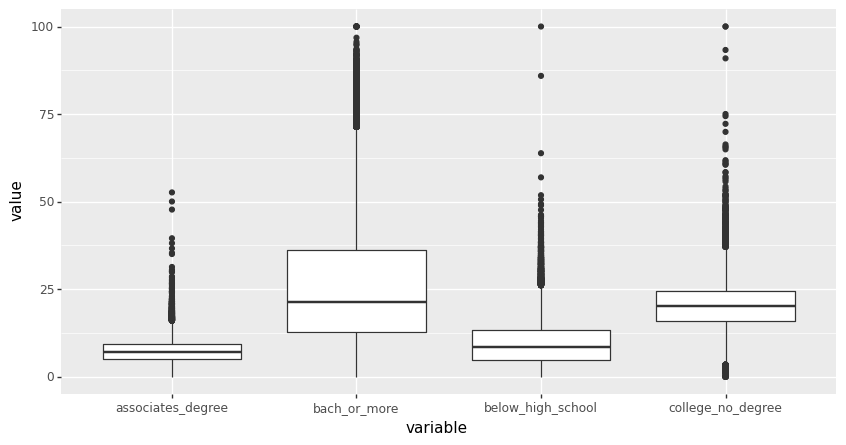

<ggplot: (8775161465712)>

In [58]:
## plot distributions 
(
    ggplot(df_for_graph,aes(x="variable", y='value')) +
    geom_boxplot() +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

**`Property value`**

In [59]:
df.value.isna().sum()

15060

In [60]:
## check distribuion
df.value.describe()

count      50285.000000
mean      242036.925525
std       193948.635138
min        10000.000000
25%       104700.000000
50%       172400.000000
75%       322200.000000
max      1000000.000000
Name: value, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


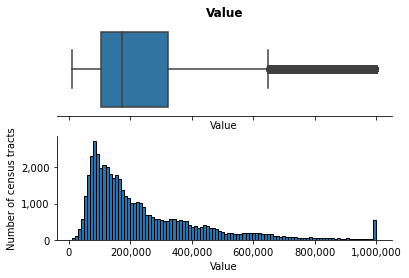

In [61]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.value, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.value,bins=100,  edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Value", fontweight='bold')
ax_box.set_xlabel("Value")
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax_hist.yaxis.set_major_formatter(tick) 
ax_box.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

**`No Vehicle`**

In [62]:
df.perc_no_vehicle.isna().sum()

14622

In [63]:
# check distribution
df.perc_no_vehicle.describe()

count    50723.000000
mean        10.445777
std         13.306962
min          0.000000
25%          2.715257
50%          5.829191
75%         12.291800
max        100.000000
Name: perc_no_vehicle, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'No vehicle')

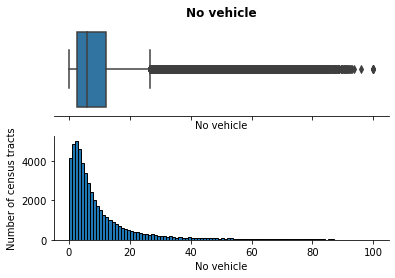

In [64]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.perc_no_vehicle, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.perc_no_vehicle,bins=100,  edgecolor='k')
plt.xlabel('No vehicle')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("No vehicle", fontweight='bold')
ax_box.set_xlabel("No vehicle")

**`Rural Population`**

In [65]:
## check missingness
df.perc_rural.isna().sum()

14503

In [67]:
## check descriptives
df.perc_rural.describe()

count    50842.000000
mean        18.894970
std         35.082566
min          0.000000
25%          0.000000
50%          0.000000
75%         14.955045
max        100.000000
Name: perc_rural, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Rural')

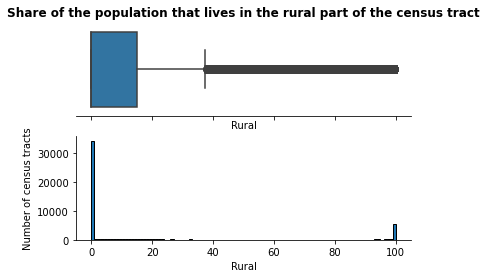

In [68]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.perc_rural, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.perc_rural,bins=100,  edgecolor='k')
plt.xlabel('Rural')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Share of the population that lives in the rural part of the census tract", fontweight='bold')
ax_box.set_xlabel("Rural")

**`SQMI`**

In [69]:
## check missingness
df.SQMI.isna().sum()

14537

In [70]:
##descriptives
df.SQMI.describe()

count    50808.000000
mean        47.524733
std        627.889701
min          0.020000
25%          0.630000
50%          1.600000
75%         10.500000
max      86166.210000
Name: SQMI, dtype: float64

/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mkbelay/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'SQMI')

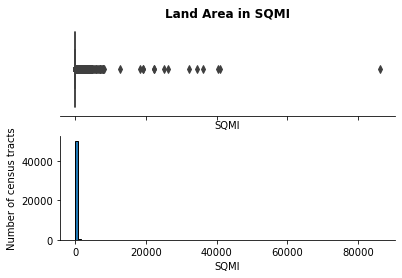

In [71]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.90, 1.0)})

sns.boxplot(df.SQMI, ax=ax_box)
#sns.distplot(mREFI.pop_density, ax=ax_hist)
plt.hist(df.SQMI,bins=100,  edgecolor='k')
plt.xlabel('SQMI')
plt.ylabel('Number of census tracts')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_title("Land Area in SQMI", fontweight='bold')
ax_box.set_xlabel("SQMI")

In [82]:
## are these populated census tracts?
df.loc[(df['SQMI']<1) & (df['perc_white']==0)&(df['perc_black']==0)&(df['perc_hispanic']==0)& (df['perc_asian']==0)&(df['perc_native']==0)& (df['perc_pacific']==0)]

,state,mrfei,fips_modified,NAME,perc_public_transport,perc_white,perc_black,perc_hispanic,perc_asian,perc_native,...,perc_snap,inequality,unemploy,below_high_school,college_no_degree,associates_degree,bach_or_more,value,perc_no_vehicle,perc_rural


Yes, these census tracts are populated.

### Correlation of all variables

In [83]:
## correlation map of all variables 
corr_all=df.corr()
corr_all

,mrfei,perc_public_transport,perc_white,perc_black,perc_hispanic,perc_asian,perc_native,perc_pacific,median_income,SQMI,...,perc_snap,inequality,unemploy,below_high_school,college_no_degree,associates_degree,bach_or_more,value,perc_no_vehicle,perc_rural
mrfei,1.000000,-0.100133,0.143246,-0.139939,-0.049742,-0.012762,0.020739,0.016104,0.074795,0.008679,...,-0.108512,-0.045856,-0.102038,-0.095057,0.002695,0.058086,0.036432,0.033887,-0.125796,0.123540
perc_public_transport,-0.100133,1.000000,-0.403527,0.286543,0.176000,0.235737,-0.041787,0.001565,-0.033422,-0.033304,...,0.219362,0.181900,0.152156,0.115392,-0.267216,-0.174117,0.087473,0.354247,0.760651,-0.241712
perc_white,0.143246,-0.403527,1.000000,-0.657998,-0.601976,-0.252707,-0.063647,-0.099635,0.315389,0.012105,...,-0.500470,-0.113201,-0.454745,-0.486267,0.078502,0.241626,0.298715,-0.028527,-0.463788,0.364863
perc_black,-0.139939,0.286543,-0.657998,1.000000,-0.102220,-0.127806,-0.051182,-0.039683,-0.334525,-0.033827,...,0.523445,0.168925,0.501751,0.405352,0.060349,-0.147283,-0.259723,-0.203780,0.401491,-0.186902
perc_hispanic,-0.049742,0.176000,-0.601976,-0.102220,1.000000,0.073515,-0.024840,0.028138,-0.180524,-0.024028,...,0.196484,-0.020444,0.125909,0.328504,-0.148193,-0.199857,-0.260103,0.079830,0.186405,-0.238020
perc_asian,-0.012762,0.235737,-0.252707,-0.127806,0.073515,1.000000,-0.036132,0.194255,0.243161,-0.030239,...,-0.166072,-0.009768,-0.089371,-0.166412,-0.151492,-0.007025,0.282255,0.457437,0.087501,-0.225051
perc_native,0.020739,-0.041787,-0.063647,-0.051182,-0.024840,-0.036132,1.000000,0.006033,-0.065925,0.304176,...,0.083571,0.021482,0.056182,0.048975,0.051004,0.013691,-0.066373,-0.069048,0.023258,0.104057
perc_pacific,0.016104,0.001565,-0.099635,-0.039683,0.028138,0.194255,0.006033,1.000000,0.015168,0.001393,...,0.008582,-0.033547,-0.002948,-0.012532,0.046196,0.035384,-0.012259,0.086704,-0.011562,-0.047274
median_income,0.074795,-0.033422,0.315389,-0.334525,-0.180524,0.243161,-0.065925,0.015168,1.000000,-0.021631,...,-0.630301,-0.204639,-0.452445,-0.612696,-0.130800,0.090371,0.721597,0.674950,-0.361881,-0.083329
SQMI,0.008679,-0.033304,0.012105,-0.033827,-0.024028,-0.030239,0.304176,0.001393,-0.021631,1.000000,...,0.014644,-0.001461,0.014888,0.004306,0.029245,-0.007689,-0.039663,-0.039863,0.019470,0.147915


Text(0.5, 1.0, 'Correlation map of all variables')

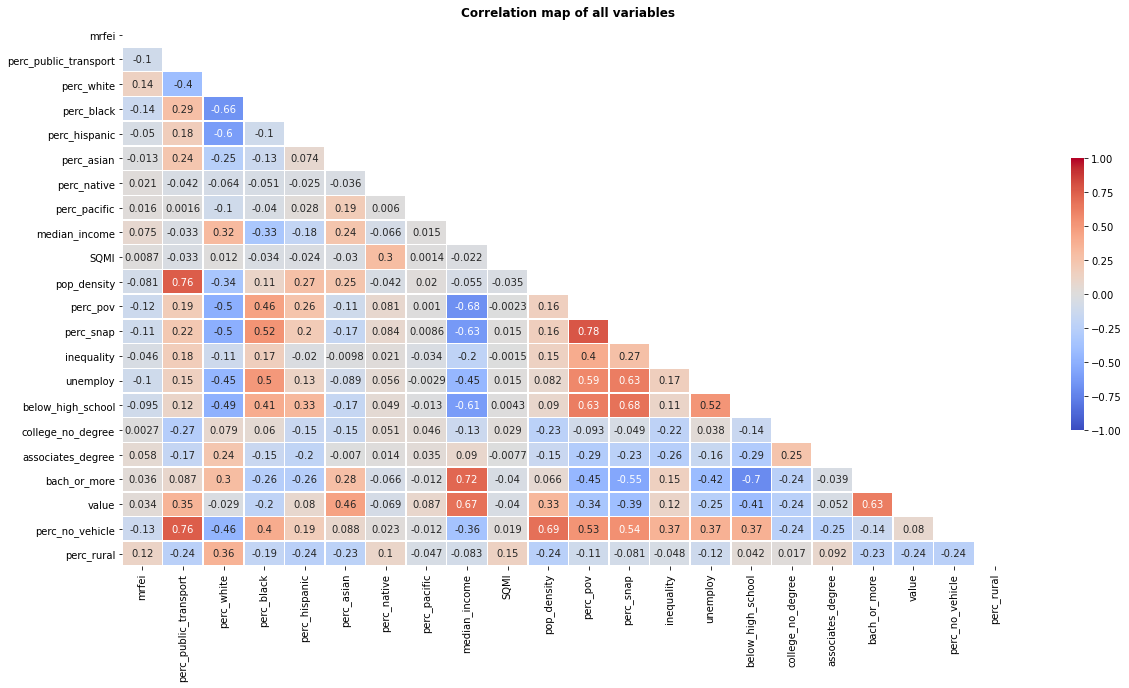

In [84]:
##plot graph
fig, ax = plt.subplots(figsize=(20,10)) 
corr_graph=sns.heatmap(corr_all, mask=np.triu(np.ones_like(corr_all, dtype=bool)),cmap="coolwarm", vmax=1, vmin=-1, center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.title('Correlation map of all variables', fontweight='bold')

________